<a href="https://colab.research.google.com/github/Datriks/Python-for-Finance/blob/master/LLoy_calc_returns_and_volatility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(16,6)
plt.style.use('bmh')

In [11]:
#download data from yahoo.finance
df = wb.DataReader('LLOY.L',
                   data_source='yahoo',
                   start='2011-1-1')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-04,68.699997,66.099998,66.709999,67.839996,182185988.0,51.203289
2011-01-05,68.529999,66.830002,67.629997,68.529999,129089224.0,51.724068
2011-01-06,68.849998,67.050003,68.269997,67.250000,108816240.0,50.757973
2011-01-07,67.949997,66.300003,67.059998,66.430000,138028432.0,50.139069
2011-01-10,66.620003,65.019997,66.410004,65.190002,119162240.0,49.203152


In [12]:
df = df.loc[:,['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'},inplace=True)
df.head()

,adj_close
Date,
2011-01-04,51.203289
2011-01-05,51.724068
2011-01-06,50.757973
2011-01-07,50.139069
2011-01-10,49.203152


In [13]:
#calculate simple returns
df['log_rtn']=np.log(df.adj_close/df.adj_close.shift(1))
df.head()

,adj_close,log_rtn
Date,,
2011-01-04,51.203289,NaN
2011-01-05,51.724068,0.010119
2011-01-06,50.757973,-0.018854
2011-01-07,50.139069,-0.012268
2011-01-10,49.203152,-0.018843


In [14]:
# remove unwanted data
df.drop('adj_close',axis=1,inplace=True)
df.dropna(axis=0,inplace=True)
df.head()

,log_rtn
Date,
2011-01-05,0.010119
2011-01-06,-0.018854
2011-01-07,-0.012268
2011-01-10,-0.018843
2011-01-11,0.015072


In [0]:
#define function to calculate realised volatility
def realised_volatility(x):
  return np.sqrt(np.sum(x**2))

In [16]:
# calc montly realised volatility
df_rv = df.groupby(pd.Grouper(freq='M')).apply(realised_volatility)
df_rv.rename(columns={'log_rtn':'rv'},inplace=True)
df_rv.head()

,rv
Date,
2011-01-31,0.080707
2011-02-28,0.086640
2011-03-31,0.054885
2011-04-30,0.080894
2011-05-31,0.105993


In [0]:
# calc anualised values
df_rv.rv = df_rv.rv * np.sqrt(12)

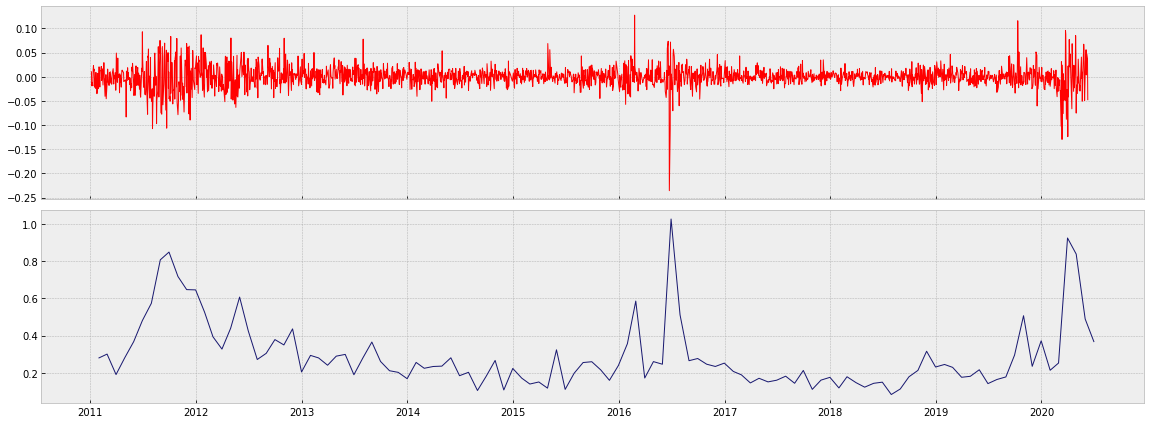

In [19]:
#Plot the results
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(df,color = 'red',lw=1)
ax[1].plot(df_rv,color='midnightblue',lw=1)
plt.tight_layout()
plt.show()